<a href="https://colab.research.google.com/github/LuLu1-1/Bosch-production-line-project/blob/main/Bosch_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/') 

Mounted at /content/gdrive/


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gc
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

datadir = r"/content/gdrive/MyDrive/bosch_data" 

In [158]:
del date_res
gc.collect()

0

# failure analysis

In [3]:
date = pd.read_csv(os.path.join(datadir,'train_date'+'.csv.zip'), index_col=0, nrows=100000, compression='zip')
#date_cols =date.columns
print("date structure: (%d, %d)"%(date.shape[0],date.shape[1]))
date.head(5)

date structure: (100000, 1156)


,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,L0_S6_D130,L0_S6_D134,L0_S7_D137,L0_S7_D139,L0_S7_D140,L0_S7_D141,L0_S7_D143,L0_S8_D145,L0_S8_D147,L0_S8_D148,L0_S8_D150,L0_S9_D152,L0_S9_D157,L0_S9_D162,L0_S9_D167,L0_S9_D172,L0_S9_D177,L0_S9_D182,L0_S9_D187,L0_S9_D192,L0_S9_D197,L0_S9_D202,L0_S9_D207,L0_S9_D212,L0_S10_D216,L0_S10_D221,L0_S10_D226,L0_S10_D231,L0_S10_D236,L0_S10_D241,L0_S10_D246,L0_S10_D251,L0_S10_D256,L0_S10_D261,L0_S10_D266,L0_S10_D271,L0_S10_D276,L0_S11_D280,L0_S11_D284,L0_S11_D288,L0_S11_D292,L0_S11_D296,L0_S11_D300,L0_S11_D304,L0_S11_D308,L0_S11_D312,L0_S11_D316,L0_S11_D320,L0_S11_D324,L0_S11_D328,L0_S12_D331,L0_S12_D333,L0_S12_D335,L0_S12_D337,L0_S12_D339,L0_S12_D341,L0_S12_D343,L0_S12_D345,L0_S12_D347,L0_S12_D349,L0_S12_D351,L0_S12_D353,L0_S13_D355,L0_S13_D357,L0_S14_D360,L0_S14_D364,L0_S14_D368,L0_S14_D372,L0_S14_D376,L0_S14_D380,L0_S14_D384,L0_S14_D388,L0_S14_D392,L0_S15_D395,L0_S15_D398,L0_S15_D401,L0_S15_D404,L0_S15_D407,L0_S15_D410,L0_S15_D413,L0_S15_D416,L0_S15_D419,L0_S16_D423,L0_S16_D428,L0_S17_D432,L0_S17_D434,L0_S18_D437,L0_S18_D441,L0_S18_D444,L0_S18_D447,L0_S18_D451,L0_S19_D454,L0_S19_D456,L0_S19_D457,L0_S19_D458,L0_S19_D460,L0_S20_D462,L0_S20_D464,L0_S20_D465,L0_S20_D467,L0_S21_D469,L0_S21_D474,L0_S21_D479,L0_S21_D484,L0_S21_D489,L0_S21_D494,L0_S21_D499,L0_S21_D504,L0_S21_D509,L0_S21_D514,L0_S21_D519,L0_S21_D524,L0_S21_D529,L0_S21_D534,L0_S21_D539,L0_S22_D543,L0_S22_D548,L0_S22_D553,L0_S22_D558,L0_S22_D563,L0_S22_D568,L0_S22_D573,L0_S22_D578,L0_S22_D583,L0_S22_D588,L0_S22_D593,L0_S22_D598,L0_S22_D603,L0_S22_D608,L0_S22_D613,L0_S23_D617,L0_S23_D621,L0_S23_D625,L0_S23_D629,L0_S23_D633,L0_S23_D637,L0_S23_D641,L0_S23_D645,L0_S23_D649,L0_S23_D653,L0_S23_D657,L0_S23_D661,L0_S23_D665,L0_S23_D669,L0_S23_D673,L1_S24_D677,L1_S24_D681,L1_S24_D685,L1_S24_D689,L1_S24_D693,L1_S24_D697,L1_S24_D702,L1_S24_D707,L1_S24_D712,L1_S24_D716,L1_S24_D721,L1_S24_D725,L1_S24_D730,L1_S24_D735,L1_S24_D739,L1_S24_D743,L1_S24_D748,L1_S24_D753,L1_S24_D758,L1_S24_D763,L1_S24_D768,L1_S24_D772,L1_S24_D777,L1_S24_D782,L1_S24_D787,L1_S24_D792,L1_S24_D797,L1_S24_D801,L1_S24_D804,L1_S24_D807,L1_S24_D809,L1_S24_D811,L1_S24_D813,L1_S24_D815,L1_S24_D818,L1_S24_D822,L1_S24_D826,L1_S24_D831,L1_S24_D836,L1_S24_D841,L1_S24_D846,L1_S24_D850,L1_S24_D854,L1_S24_D859,L1_S24_D864,L1_S24_D869,L1_S24_D874,L1_S24_D879,L1_S24_D884,L1_S24_D889,L1_S24_D894,L1_S24_D899,L1_S24_D904,L1_S24_D909,L1_S24_D913,L1_S24_D917,L1_S24_D922,L1_S24_D927,L1_S24_D932,L1_S24_D937,L1_S24_D941,L1_S24_D945,L1_S24_D950,L1_S24_D955,L1_S24_D960,L1_S24_D965,L1_S24_D970,L1_S24_D975,L1_S24_D980,L1_S24_D985,L1_S24_D990,L1_S24_D995,L1_S24_D999,L1_S24_D1001,L1_S24_D1003,L1_S24_D1005,L1_S24_D1007,L1_S24_D1009,L1_S24_D1011,L1_S24_D1013,L1_S24_D1015,L1_S24_D1018,L1_S24_D1023,L1_S24_D1028,L1_S24_D1033,L1_S24_D1038,L1_S24_D1043,L1_S24_D1048,L1_S24_D1053,L1_S24_D1058,L1_S24_D1062,L1_S24_D1066,L1_S24_D1070,L1_S24_D1074,L1_S24_D1077,L1_S24_D1081,L1_S24_D1085,L1_S24_D1089,L1_S24_D1092,L1_S24_D1096,L1_S24_D1100,L1_S24_D1104,L1_S24_D1108,L1_S24_D1112,L1_S24_D1116,L1_S24_D1120,L1_S24_D1124,L1_S24_D1128,L1_S24_D1132,L1_S24_D1135,L1_S24_D1138,L1_S24_D1141,L1_S24_D1143,L1_S24_D1146,L1_S24_D1149,L1_S24_D1151,L1_S24_D1153,L1_S24_D1155,L1_S24_D1158,L1_S24_D1163,L1_S24_D1168,L1_S24_D1171,L1_S24_D1173,L1_S24_D1175,L1_S24_D1178,L1_S24_D1182,L1_S24_D1186,L1_S24_D1190,L1_S24_D1194,L1_S24_D1199,L1_S24_D1204,L1_S24_D1209,L1_S24_D1214,L1_S24_D1218,L1_S24_D1222,L1_S24_D1227,L1_S24_D1232,L1_S24_D1237,L1_S24_D1242,L1_S24_D1247,L1_S24_D1252,L1_S24_D1257,L1_S24_D1262,L1_S24_D1267,L1_S24_D1272,L1_S24_D1277,L1_S24_D1281,L1_S24_D1285,L1_S24_D1290,L1_S24_D1295,L1_S24_D1300,

In [4]:
response = pd.read_csv(os.path.join(datadir,'train_numeric'+'.csv.zip'), index_col=0, nrows=100000, usecols=['Id','Response'], compression='zip')
# date_res = pd.concat([date,response],axis=1)
# date_res.head(5)

Text(0.5, 1.0, 'null values ratio')

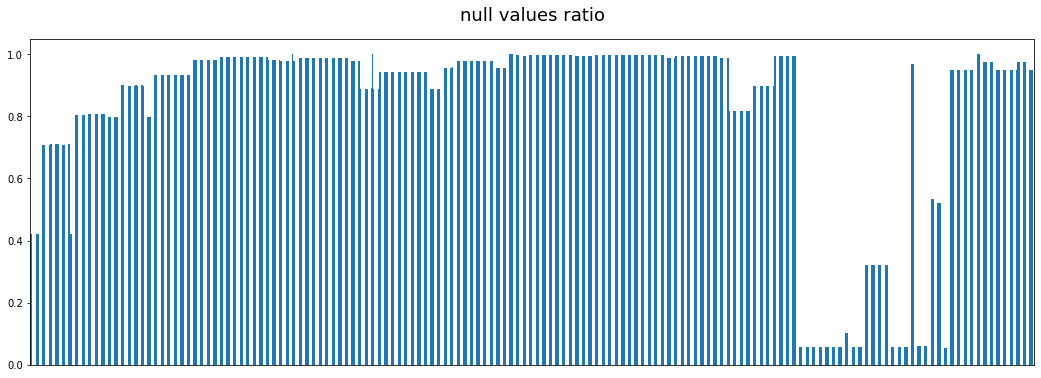

In [22]:
(date_res.isnull().sum()/date.shape[0]).plot.bar(figsize=(18,6))
plt.xticks([])
plt.title('null values ratio',fontsize=18,pad=18)

In [29]:
def get_line_station():
  splits = [tuple([a  for a in x.split('_')]) for x in date.columns]
  a = pd.DataFrame(splits,columns=['Line','Station','Feature'])
  return a

lsf = get_line_station()
lsf.head(5)

,Line,Station,Feature
0,L0,S0,D1
1,L0,S0,D3
2,L0,S0,D5
3,L0,S0,D7
4,L0,S0,D9


In [41]:
lsf.nunique()

Line          4
Station      52
Feature    1156
dtype: int64

failure rate:  0.00568


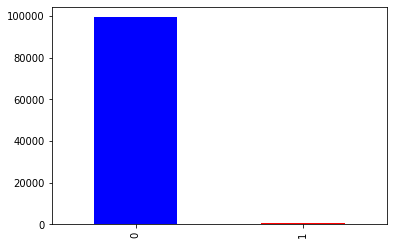

In [36]:
date_res.Response.value_counts().plot.bar(color=['b','r'])
print('failure rate: ', date_res.Response.sum()/date_res.shape[0])

In [6]:
tuples = [tuple([int(a[1:]) for a in x.split('_')]) for x in date.columns]
new_columns = pd.MultiIndex.from_tuples(tuples, names=['line','station', 'feature'])
date.columns = new_columns
date.head(5)

line           0                                                        \
station       0                                                          
feature     1        3        5        7        9        11       13     
Id                                                                       
4          82.24    82.24    82.24    82.24    82.24    82.24    82.24   
6            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7        1618.70  1618.70  1618.70  1618.70  1618.70  1618.70  1618.70   
9        1149.20  1149.20  1149.20  1149.20  1149.20  1149.20  1149.20   
11        602.64   602.64   602.64   602.64   602.64   602.64   602.64   

line                                                                    \
station                                                    1             
feature     15       17       19       21       23       26       30     
Id                                                                       
4          82.24    82.24    82.24    82.24    82.24    82.24    82.24   
6            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7        1618.70  1618.70  1618.70  1618.70  1618.70  1618.70  1618.70   
9        1149.20  1149.20  1149.20  1149.20  1149.20  1149.20  1149.20   
11        602.64   602.64   602.64   602.64   602.64   602.64   602.64   

line                                                                    \
station       2                                                          
feature     34       38       42       46       50       54       58     
Id                                                                       
4          82.24    82.24    82.24    82.24    82.24    82.24    82.24   
6            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7        1618.70  1618.70  1618.70  1618.70  1618.70  1618.70  1618.70   
9        1149.21  1149.21  1149.21  1149.21  1149.21  1149.21  1149.21   
11           NaN      NaN      NaN      NaN      NaN      NaN      NaN   

line                                                                       \
station                        3                                            
feature     62       66      70      74      78      82      86      90     
Id                                                                          
4          82.24    82.24     NaN     NaN     NaN     NaN     NaN     NaN   
6            NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7        1618.70  1618.70     NaN     NaN     NaN     NaN     NaN     NaN   
9        1149.21  1149.21     NaN     NaN     NaN     NaN     NaN     NaN   
11           NaN      NaN  602.64  602.64  602.64  602.64  602.64  602.64   

line                                                                          \
station                               4                 5                 6    
feature    94      98      102      106      111      115      117      120    
Id                                                                             
4           NaN     NaN     NaN    82.26    82.26      NaN      NaN      NaN   
6           NaN     NaN     NaN      NaN      NaN      NaN      NaN      NaN   
7           NaN     NaN     NaN      NaN      NaN  1618.72  1618.72  1618.72   
9           NaN     NaN     NaN  1149.22  1149.22      NaN      NaN      NaN   
11       602.64  602.64  602.64   602.66   602.66      NaN      NaN      NaN   

line                                                                    \
station                                           7                      
feature     124      127      130      134      137      139      140    
Id                                                                       
4            NaN      NaN      NaN      NaN    82.26    82.26    82.26   
6            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7        1618.72  1618.72  1618.72  1618.72      NaN      NaN      NaN   
9            NaN      NaN      NaN      NaN  1149.22  1149.22  114

In [43]:
lf = pd.concat([date.groupby(level=0,axis=1).min(),response],axis=1)
lf

,0,1,2,3,Response
Id,,,,,
4,82.24,NaN,NaN,87.26,0
6,1313.12,NaN,NaN,1315.73,0
7,1618.70,NaN,NaN,1624.40,0
9,1149.20,NaN,NaN,1154.12,0
11,602.64,NaN,NaN,606.00,0
...,...,...,...,...,...
200346,NaN,1154.61,1172.97,1177.40,0
200347,1261.73,NaN,1262.32,1266.37,0
200349,1374.22,NaN,NaN,1376.51,0


Text(0.5, 1.0, 'products transported in lines')

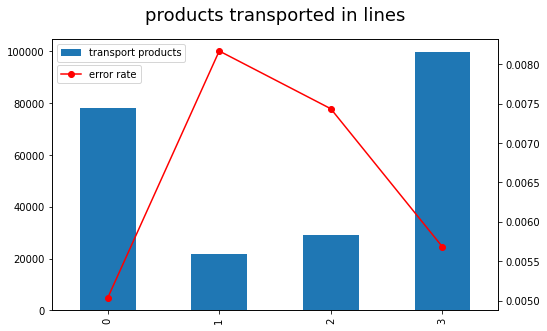

In [54]:
plt.figure(figsize=(8,5))
a = lf.iloc[:,:4].notna().sum().plot.bar(label='transport products')
plt.legend(loc='left')
b = a.twinx()
b.plot(lf.loc[lf.Response==1,lf.columns[:4]].notna().sum(axis=0)/lf.iloc[:,:4].notna().sum(axis=0),color='r',marker='o',label='error rate')
plt.legend(bbox_to_anchor=(0.21,0.92))
plt.title('products transported in lines',fontsize=18,pad=18)

In [41]:
sf = pd.concat([date.groupby(level=1,axis=1).min(),response],axis=1)
sf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,82.24,82.24,82.24,NaN,82.26,NaN,NaN,82.26,82.27,NaN,NaN,82.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.26,87.26,87.27,NaN,87.28,87.28,87.29,NaN,87.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1313.12,1313.12,1313.12,NaN,1313.14,NaN,1313.15,NaN,1313.15,1313.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315.73,1315.73,NaN,NaN,1315.75,1315.75,1315.75,NaN,1315.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1618.70,1618.70,1618.70,NaN,NaN,1618.72,1618.72,NaN,1618.73,NaN,1618.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.40,1624.41,NaN,NaN,1624.42,1624.42,1624.42,NaN,1624.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,1149.20,1149.20,1149.21,NaN,1149.22,NaN,NaN,1149.22,1149.22,NaN,1149.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1154.12,1154.13,NaN,NaN,1154.14,1154.15,NaN,1154.16,1154.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11,602.64,602.64,NaN,602.64,602.66,NaN,NaN,602.67,602.67,NaN,NaN,602.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606.00,606.00,NaN,NaN,606.01,606.01,NaN,606.02,606.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Text(0.5, 1.0, 'products transported in stations')

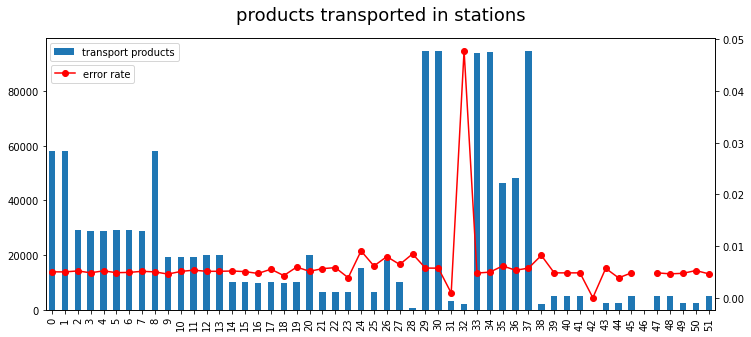

In [63]:
plt.figure(figsize=(12,5))
a = sf.iloc[:,:52].notna().sum().plot.bar(label='transport products')
plt.legend(bbox_to_anchor=(0.206,1))
b = a.twinx()
b.plot(sf.loc[sf.Response==1,sf.columns[:52]].notna().sum(axis=0)/sf.iloc[:,:52].notna().sum(axis=0),color='r',marker='o',label='error rate')
plt.legend(bbox_to_anchor=(0.14,0.92))
plt.title('products transported in stations',fontsize=18,pad=18)

In [88]:
def calc_stat(x, feat):
  a = x.groupby(feat).Response.agg(['mean', 'sum', 'count']).sort_values(['count'], ascending=False)
  a['confidence_interval'] = 1.96 * np.sqrt(a['mean'] * (1-a['mean']) / a['count'])
  a['mean_low'] = a['mean'] - a['confidence_interval']
  a['mean_high'] = a['mean'] + a['confidence_interval']
  a.sort_values('count', ascending=False, inplace=True)
  return a

# time series analysis

In [5]:
# start date, end date, duration, response
t = pd.concat([date.min(axis=1), date.max(axis=1), date.max(axis=1)-date.min(axis=1)], axis=1)
t.columns = ['date_start', 'date_end', 'date_duration']
# date.sort_values(by=['date_start', 'Id'], inplace=True)
t.dropna(axis=0, inplace=True)
t.drop_duplicates(keep='last',inplace=True)
t['Response'] = response

date_start

In [6]:
start = t.groupby('date_start')['Response'].agg(['mean', 'sum', 'count']).sort_values(['count'], ascending=False)
start.sort_index(inplace=True)

In [7]:
from statsmodels.tsa.stattools import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing,AR,ARIMA,ARMA
lags = [3,4,8,16,32]
LB = sm.stats.diagnostic.acorr_ljungbox(start['count'][:10000],lags = lags,return_df = True)
#plt.plot(x.index,x['count'])
LB # examine if noise (null hypo: noise)

,lb_stat,lb_pvalue
3,1879.450483,0.0
4,2032.741714,0.0
8,2414.726606,0.0
16,2554.847134,0.0
32,2814.305705,0.0


In [8]:
dftest = adfuller(start['count'][:2000],autolag='BIC')
dfoutput = pd.Series(dftest[0:4], index=['adf','p-value','usedlag','Number of Observations Used'])
print("adf results:\n",dfoutput)
# examine if stationary  ((null hypo: has unit root, stationary))

adf results:
 adf                              -50.047305
p-value                            0.000000
usedlag                            6.000000
Number of Observations Used    26285.000000
dtype: float64


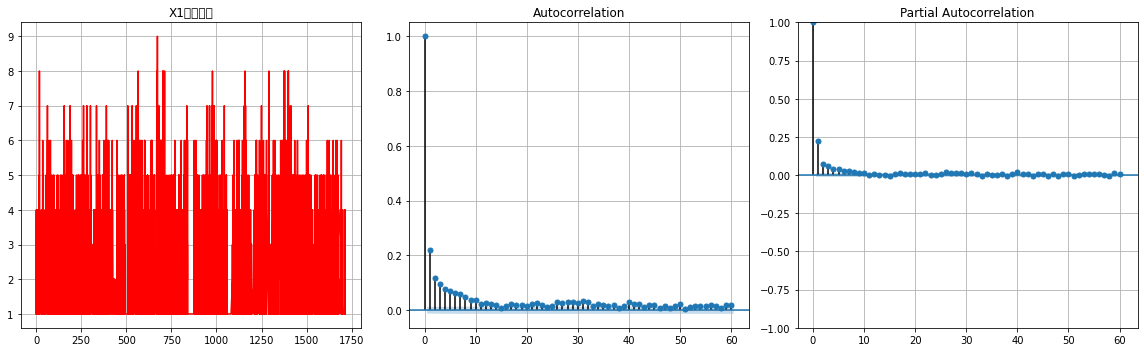

In [9]:
## autocorrelation and partial correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.plot(start['count'][:5000],"r-")
plt.grid()
plt.title("X1序列波动")
ax = fig.add_subplot(1,3,2)
plot_acf(start['count'][:5000], lags=60,ax = ax)
plt.grid()
ax = fig.add_subplot(1,3,3)
plot_pacf(start['count'][:5000], lags=60,ax = ax)
plt.ylim([-1,1])
plt.grid()
plt.tight_layout()
plt.show()

In [76]:
#  interpolate the sequence to uniform intervals
from scipy.fftpack import fft, fftfreq
ti = np.arange(start.index.min(), start.index.max(), 0.01) # time axis
x_counts = np.interp(ti, start.index, start['count']) # interpolated part counts 
x_error_rate = np.interp(ti, start.index, start['mean']) # interpolated part error rate
x_errors = np.interp(ti, start.index, start['sum']) # interpolated part error
N = 30000 # total number of time points
T = 0.01 # time interval
f = np.linspace(0.0, 1.0/(2.0*T), N/2) # frequency axis
y_counts = fft(x_counts) # fft of x_counts
y_errors = fft(x_errors) # fft of x_errors
y_error_rate = fft(x_error_rate) # fft of x_error_rate
 # plot frequency 
plt.plot(f, 10*np.log10(2.0/N * np.abs(y_counts[:N//2])))
plt.axis([0.05, 0.15, 10, 20.22]) # zoom in

TypeError: ignored

Text(0.5, 1.0, 'A weekend')

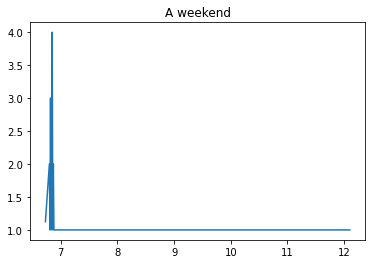

In [48]:
M = 1680 # this is one week's samples
# N1 = int(M*1 + 1.65*M/7)
# N2 = int(M*1 + 2.3*M/7)
N1 = int(M*0+0.40*M)
N2 = int(M*0+0.72*M)
plt.plot(ti[N1:N2+1], x_counts[N1:N2+1])
plt.title('A weekend')

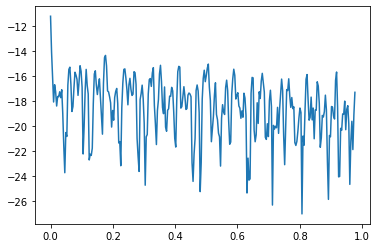

In [47]:
Ns = 300
plt.plot(f[:Ns], 10*np.log10(2.0/N * np.abs(y_errors[:Ns])))

In [25]:
# interpolate the sequence to continious
time_ticks = np.arange(start.index.min(), start.index.max() + 0.01, 0.01)
time_ticks = pd.merge(pd.DataFrame({'date_start': time_ticks}), start, how='left',on='date_start').fillna(0)
time_ticks.set_index('date_start',drop=True,inplace=True)

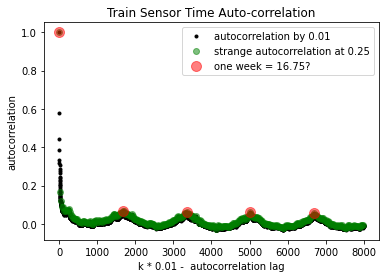

In [27]:
# Autocorrelation
x = time_ticks['count'].values
max_lag = 8000
auto_corr_ks = range(1, max_lag)
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
fig = plt.figure()
plt.plot(auto_corr, 'k.', label='autocorrelation by 0.01')
plt.title('Train Sensor Time Auto-correlation')
period = 25
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'go', alpha=0.5, label='strange autocorrelation at 0.25')
period = 1675
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'ro', markersize=10, alpha=0.5, label='one week = 16.75?')
plt.xlabel('k * 0.01 -  autocorrelation lag')
plt.ylabel('autocorrelation')
plt.legend(loc=0)

(0.0, 1680.0)

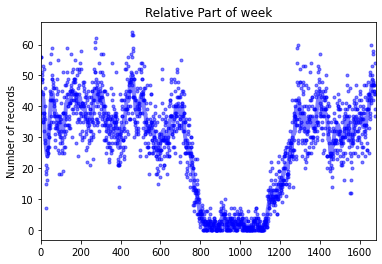

In [56]:
week_duration = 1679
time_ticks['week_part'] = ((time_ticks.index * 100) % week_duration).astype(np.int64)
# Aggregate weekly stats
train_week_part = time_ticks.groupby('week_part')['count'].sum().reset_index().set_index('week_part',drop=True)
fig = plt.figure()
plt.plot(train_week_part, 'b.', alpha=0.5, label='train count')
y_train = train_week_part['count'].rolling(window=20, center=True).mean().values
plt.plot(train_week_part.index, y_train, 'b-', linewidth=4, alpha=0.5, label='train count smooth')
plt.title('Relative Part of week')
plt.ylabel('Number of records')
plt.xlim(0, 1680)

date_end

In [11]:
end = t.groupby('date_end')['Response'].agg(['mean', 'sum', 'count']).sort_values(['count'], ascending=False)
end.sort_index(inplace=True)

In [12]:
ti = np.arange(end.index.min(), end.index.max(), 0.01)
e_counts = np.interp(ti, end.index, end['count']) # interpolated part counts 
e_error_rate = np.interp(ti, end.index, end['mean']) # interpolated part error rate
e_errors = np.interp(ti, end.index, end['sum']) # interpolated part error
ef_counts = fft(e_counts) # fft of x_counts
ef_errors = fft(e_errors) # fft of x_errors
ef_error_rate = fft(e_error_rate) # fft of x_error_rate

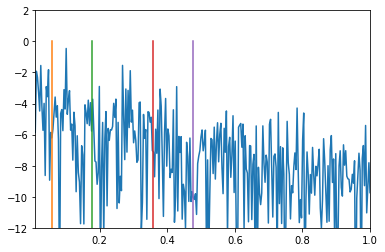

In [15]:
Ns = 3000
plt.plot(f[:Ns], 10*np.log10(2.0/N * np.abs(ef_counts[:Ns]))) # plot frequency 
plt.axis([0.01, 1., -12, 2])
plt.plot([0.0595, 0.0595], [-15, 0])
plt.plot([0.0595*3, 0.0595*3], [-15, 0])
plt.plot([0.0595*6, 0.0595*6], [-15, 0])
plt.plot([0.0595*8, 0.0595*8], [-15, 0])

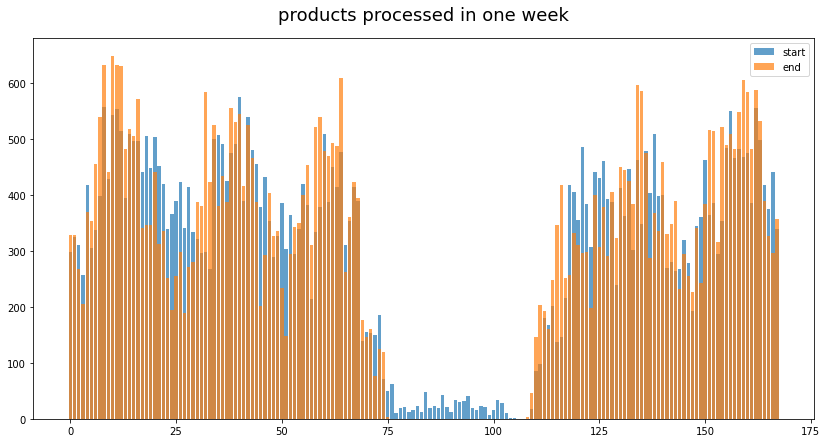

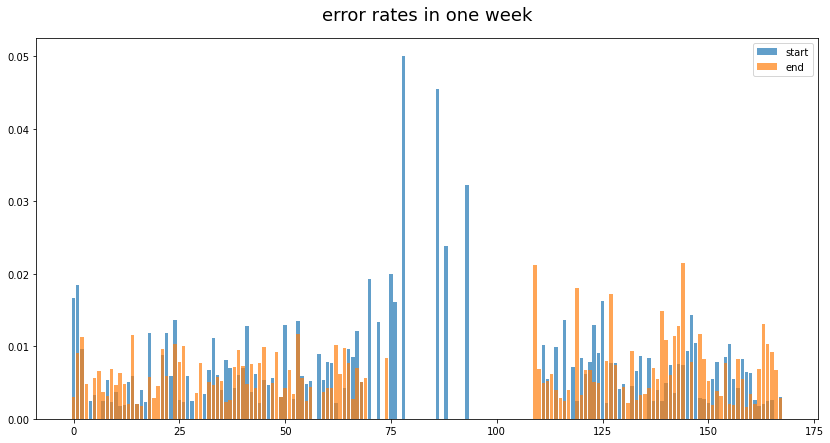

In [81]:
Nm = 1
tmp = (t['date_start'] % (16.8 * Nm))/(16.8*Nm)*168
t['date_start_mod1'] = tmp.values.astype(int)
a = t.groupby('date_start_mod1').Response.agg(['mean', 'sum', 'count'])
a.reset_index(inplace=True)
a.sort_values('date_start_mod1', ascending=True)

tmp = (t['date_end'] % (16.8 * Nm))/(16.8*Nm)*168
t['date_end_mod1'] = tmp.values.astype(int)
b = t.groupby('date_end_mod1').Response.agg(['mean', 'sum', 'count'])
b.reset_index(inplace=True)
b.sort_values('date_end_mod1', ascending=True)

# plt.plot(a['count']/10000)
# plt.plot(a['sum']/100)
fig = plt.figure(figsize=(14, 7))
plt.bar(a['date_start_mod1'], a['count'], alpha=0.7,label='start')
plt.bar(b['date_end_mod1'], b['count'], alpha=0.7,label='end')
# plt.plot(b['count']*10**-6)
plt.legend()
plt.title('products processed in one week',fontsize=18,pad=18)
plt.show()

fig = plt.figure(figsize=(14, 7))
plt.bar(a['date_start_mod1'], a['mean'], alpha=0.7,label='start')
plt.bar(b['date_end_mod1'], b['mean'], alpha=0.7,label='end')
# plt.plot(b['count']*10**-6)
plt.legend()
plt.title('error rates in one week',fontsize=18,pad=18)
plt.show()

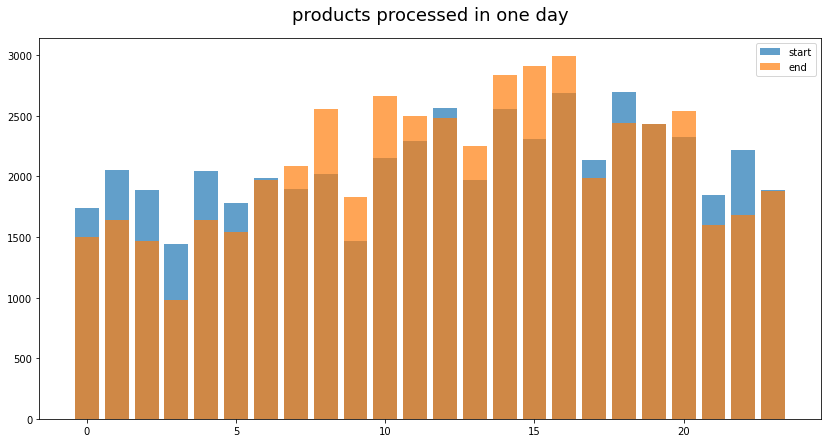

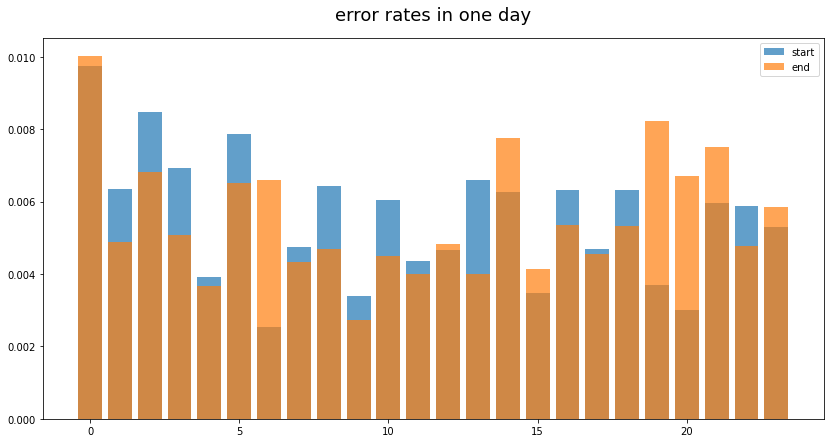

In [87]:
Nm = 1
P = 24
tmp = (t['date_start'] % (P * Nm / 10))/(P * Nm / 10) * P
t['date_start_mod1'] = tmp.values.astype(int)
a = t.groupby('date_start_mod1').Response.agg(['mean', 'sum', 'count'])
a.reset_index(inplace=True)
a.sort_values('date_start_mod1', ascending=True)

tmp = (t['date_end'] % (P * Nm / 10))/(P * Nm / 10) * P
t['date_end_mod1'] = tmp.values.astype(int)
b = t.groupby('date_end_mod1').Response.agg(['mean', 'sum', 'count'])
b.reset_index(inplace=True)
b.sort_values('date_end_mod1', ascending=True)

# plt.plot(a['count']/10000)
# plt.plot(a['sum']/100)
fig = plt.figure(figsize=(14, 7))
plt.bar(a['date_start_mod1'], a['count'], alpha=0.7,label='start')
plt.bar(b['date_end_mod1'], b['count'], alpha=0.7,label='end')
# plt.plot(b['count']*10**-6)
plt.legend()
plt.title('products processed in one day',fontsize=18,pad=18)
plt.show()

fig = plt.figure(figsize=(14, 7))
plt.bar(a['date_start_mod1'], a['mean'], alpha=0.7,label='start')
plt.bar(b['date_end_mod1'], b['mean'], alpha=0.7,label='end')
# plt.plot(b['count']*10**-6)
plt.legend()
plt.title('error rates in one day',fontsize=18,pad=18)
plt.show()